In [1]:
import numpy as np
import math
from astropy.io import fits
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
import glob
import copy
import pandas as pd
import os
from scipy.optimize import curve_fit
from scipy import optimize
from dateutil.parser import parse
from scipy.stats import poisson, norm
import datetime
from scipy.signal import find_peaks
from matplotlib import colors

In [2]:
angle=np.arange(8.000964,120.013032, 0.5041 )
#print(angle)

In [3]:
data= open('NaClbrutoPlano.dat', 'r') 
x0 = []
x1 = []
x2 = []
x3 = []
x4 = []
x5 = []
x6 = []
x7 = []
x8 = []
x9 = []

for line in data:
    p = line.split()
    x0.append(float(p[0]))
    x1.append(float(p[1]))
    x2.append(float(p[2]))
    x3.append(float(p[3]))
    x4.append(float(p[4]))
    x5.append(float(p[5]))
    x6.append(float(p[6]))
    x7.append(float(p[7]))
    x8.append(float(p[8]))
    x9.append(float(p[9]))
   

In [4]:
plt.rcParams.update({
"image.origin": "lower",
"image.aspect": 1,
"text.usetex": True,
"grid.alpha": .5,
}) 
plt.style.use('ggplot')

In [5]:
print(len(x0),len(angle[:-1]))

222 222


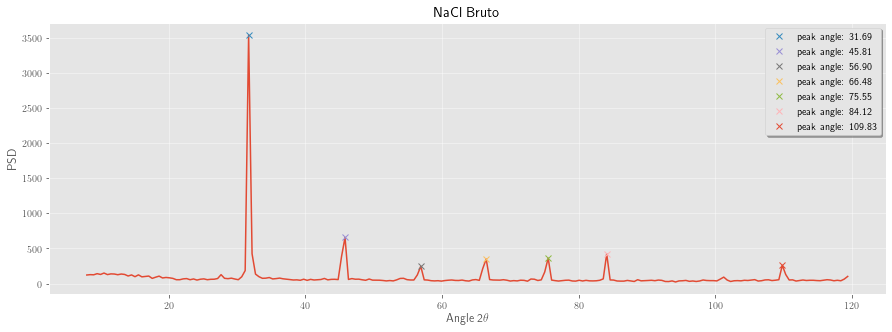

In [62]:
peaks, _ = find_peaks(x8, height=200, threshold=20)
plt.figure(figsize=(15,5))
#plt.plot(angle[:-1],x0)
# plt.plot(angle[:-1],x1)
# plt.plot(angle[:-1],x2)
# plt.plot(angle[:-1],x3)
# plt.plot(angle[:-1],x4)
# plt.plot(angle[:-1],x5)
# plt.plot(angle[:-1],x6)
# plt.plot(angle[:-1],x7)
# plt.plot(angle[:-1],x8)

plt.plot(angle[:-1],x8)
plt.ylabel('PSD')
plt.xlabel('Angle 2$\\theta$')
plt.title('NaCl Bruto');
for i in peaks: plt.plot(angle[i],x8[i],"x", label="peak angle: {:.2f}".format(angle[i]))
plt.legend( fancybox=True, shadow=True);


In [63]:
angles=[math.radians(angle[i]/2) for i in peaks]
#print(angles)
dAA=[1.54184/(np.sin(i)*2) for i in angles]
print(dAA)


[2.823193566668734, 1.98082185615948, 1.6182831138250435, 1.4064747318462583, 1.2585118841876475, 1.1507833835051822, 0.9421040428412898]


In [64]:
hkl=[[1,0,0],[1,1,0],[1,1,1],[2,0,0],[2,1,0],[2,1,1],[2,2,0],[3,0,0],[3,1,0],[3,1,1],[2,2,2],[3,2,0],[3,2,1],
     [4,0,0],[4,1,0],[4,1,1],[3,3,1],[4,2,0],[4,2,1],[3,3,2],[4,2,2],[5,0,0]]

In [65]:
m=0
hkl2=[]
for i in hkl:
    j=0
    for j in i: 
        m+=j**2
    hkl2.append(m)
    m=0
print(hkl2)

[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 24, 25]


In [66]:
def m (a, daa):
    return (a/daa)**2
for daa in dAA: 
    print(daa, m(cubic(dAA[0],hkl[3]),daa),round(m(cubic(dAA[0],hkl[3]),daa)), int(m(cubic(dAA[0],hkl[3]),daa)))

    #print(hkl2.index(round(m(cubic(dAA[0],hkl[2]),daa))))
   # print(daa, hkl[hkl2.index(round(m(cubic(dAA[0],hkl[2]),daa)))])

2.823193566668734 4.0 4.0 4
1.98082185615948 8.125506912422688 8.0 8
1.6182831138250435 12.17397198014415 12.0 12
1.4064747318462583 16.11674870290042 16.0 16
1.2585118841876475 20.12920676027411 20.0 20
1.1507833835051822 24.0743260465249 24.0 24
0.9421040428412898 35.920598799338585 36.0 35


In [67]:
def cubic(d,par):
    return d*np.sqrt(par[0]**2+par[1]**2+par[2]**2)

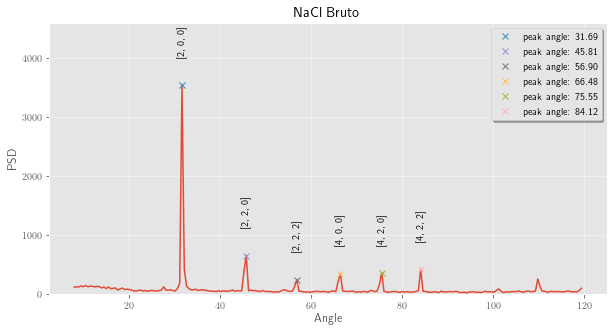

In [88]:
plt.figure(figsize=(10,5))
plt.plot(angle[:-1],x8)
plt.ylabel('PSD')
plt.xlabel('Angle')
plt.title('NaCl Bruto')
plt.ylim(0,4600);
for i in peaks[:-1]:
    plt.plot(angle[i],x8[i],"x", label="peak angle: {:.2f}".format(angle[i])) 
    plt.text(angle[i],x8[i]+500,str(hkl[hkl2.index(int(m(cubic(dAA[0],hkl[3]),1.54184/(np.sin(math.radians(angle[i]/2))*2))))]),ha='center',rotation=90)
plt.legend( fancybox=True, shadow=True);

In [87]:
a=[]
for i in peaks[:-1]:
    if i >100:
        print(1.54184/(np.sin(math.radians(angle[i]/2))*2),hkl[hkl2.index(int(m(cubic(dAA[0],hkl[3]),1.54184/(np.sin(math.radians(angle[i]/2))*2))))],cubic(1.54184/(np.sin(math.radians(angle[i]/2))*2),hkl[hkl2.index(int(m(cubic(dAA[0],hkl[3]),1.54184/(np.sin(math.radians(angle[i]/2))*2))))]))
        a.append(cubic(1.54184/(np.sin(math.radians(angle[i]/2))*2),hkl[hkl2.index(int(m(cubic(dAA[0],hkl[3]),1.54184/(np.sin(math.radians(angle[i]/2))*2))))]))
    else:
        a.append(cubic(1.54184/(np.sin(math.radians(angle[i]/2))*2),hkl[hkl2.index(int(m(cubic(dAA[0],hkl[3]),1.54184/(np.sin(math.radians(angle[i]/2))*2))))]))
        print(1.54184/(np.sin(math.radians(angle[i]/2))*2),hkl[hkl2.index(round(m(cubic(dAA[0],hkl[3]),1.54184/(np.sin(math.radians(angle[i]/2))*2))))],cubic(1.54184/(np.sin(math.radians(angle[i]/2))*2),hkl[hkl2.index(round(m(cubic(dAA[0],hkl[3]),1.54184/(np.sin(math.radians(angle[i]/2))*2))))]))

2.823193566668734 [2, 0, 0] 5.646387133337468
1.98082185615948 [2, 2, 0] 5.60261026725157
1.6182831138250435 [2, 2, 2] 5.605897148351488
1.4064747318462583 [4, 0, 0] 5.625898927385033
1.2585118841876475 [4, 2, 0] 5.628236247069845
1.1507833835051822 [4, 2, 2] 5.637664188122527


In [86]:
print(a)
print(np.mean(a),np.std(a))

[5.646387133337468, 5.60261026725157, 5.605897148351488, 5.625898927385033, 5.628236247069845, 5.637664188122527]
5.624448985252989 0.015776933948440274


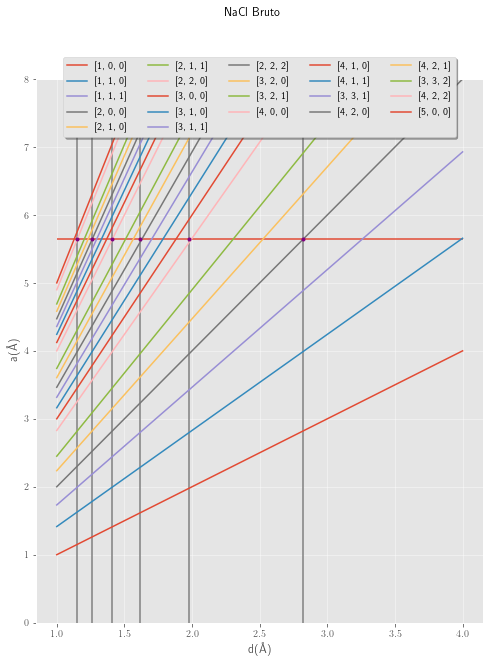

In [95]:
dlista=np.linspace(1,4,1000)
plt.figure(figsize=(8,10))
for i in range(len(hkl)):
    plt.plot(dlista,cubic(dlista,hkl[i]),label=str(hkl[i]))

for i in dAA[:-1]:
    plt.vlines(i,0,20, colors="tab:gray")
    plt.plot(i,cubic(dAA[0],hkl[3]),'.',c='purple')
    
plt.ylabel("a(\AA)")
plt.xlabel("d(\AA)")
#plt.hlines(5.735326928,1,4,  colors="black")
plt.hlines(cubic(dAA[0],hkl[3]),1,4)
plt.suptitle("NaCl Bruto")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=5, fancybox=True, shadow=True)
plt.ylim(0,8);


In [94]:
!jupyter nbconvert --to html --no-input Untitled.ipynb

[NbConvertApp] Converting notebook Untitled.ipynb to html
[NbConvertApp] Writing 888485 bytes to Untitled.html
